In [ ]:
import pandas as pd
df = pd.read_csv('./data/well_index.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47424 entries, 0 to 47423
Data columns (total 25 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   WA                                                                                                           47424 non-null  int64  
 1   Well Name                                                                                                    47424 non-null  object 
 2   Bottom Hole                                                                                                  47424 non-null  object 
 3   R                                                                                                            47424 non-null  object 
 4   Mode                                                      

In [3]:
#Removing unneeded attributes
df = df[['WA', 'Mode', 'Fluid', 'RR Date', 'Form', 'Area']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47424 entries, 0 to 47423
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WA       47424 non-null  int64  
 1   Mode     47424 non-null  object 
 2   Fluid    47424 non-null  object 
 3   RR Date  37878 non-null  float64
 4   Form     30802 non-null  object 
 5   Area     47422 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.2+ MB


In [4]:
df = df.dropna(subset=['Form'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30802 entries, 3 to 47416
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WA       30802 non-null  int64  
 1   Mode     30802 non-null  object 
 2   Fluid    30802 non-null  object 
 3   RR Date  30719 non-null  float64
 4   Form     30802 non-null  object 
 5   Area     30800 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
#Removing all non-abandoned wells
df = df[df['Mode'] == 'ABAN']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9519 entries, 3 to 42343
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WA       9519 non-null   int64  
 1   Mode     9519 non-null   object 
 2   Fluid    9519 non-null   object 
 3   RR Date  9519 non-null   float64
 4   Form     9519 non-null   object 
 5   Area     9519 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 520.6+ KB


In [6]:
abandonDF = pd.read_csv('./data/Well Surface Abandonments.csv')
abandonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   WA Num                 11089 non-null  int64 
 1   Well Name              11089 non-null  object
 2   Operator               11089 non-null  object
 3   Abandoned Status Date  11089 non-null  object
 4   Casing Cutoff Flag     11089 non-null  object
 5   COR Flag               11089 non-null  object
dtypes: int64(1), object(5)
memory usage: 519.9+ KB


In [ ]:
#Merging additional attributes from Well Surface Abandonments.csv
abandonDF['WA'] = abandonDF['WA Num']
df = pd.merge(df, abandonDF, on='WA')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WA                     9486 non-null   int64  
 1   Mode                   9486 non-null   object 
 2   Fluid                  9486 non-null   object 
 3   RR Date                9486 non-null   float64
 4   Form                   9486 non-null   object 
 5   Area                   9486 non-null   float64
 6   WA Num                 9486 non-null   int64  
 7   Well Name              9486 non-null   object 
 8   Operator               9486 non-null   object 
 9   Abandoned Status Date  9486 non-null   object 
 10  Casing Cutoff Flag     9486 non-null   object 
 11  COR Flag               9486 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 889.4+ KB


In [ ]:
#Removing uneeded attributes
df = df[['WA', 'Fluid', 'Form', 'RR Date', 'Abandoned Status Date', 'Area']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WA                     9486 non-null   int64  
 1   Fluid                  9486 non-null   object 
 2   Form                   9486 non-null   object 
 3   RR Date                9486 non-null   float64
 4   Abandoned Status Date  9486 non-null   object 
 5   Area                   9486 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 444.8+ KB


In [ ]:
#Filling missing rig release dates with K-Nearest neighbour as the dates are roughly linear
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

imputed_data = imputer.fit_transform(df[['RR Date']])

imputed_df = pd.DataFrame(imputed_data, columns=['RR Date'])

df = pd.concat([df.drop(columns=['RR Date']), imputed_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WA                     9486 non-null   int64  
 1   Fluid                  9486 non-null   object 
 2   Form                   9486 non-null   object 
 3   Abandoned Status Date  9486 non-null   object 
 4   Area                   9486 non-null   float64
 5   RR Date                9486 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 444.8+ KB


In [10]:
df['Fluid'].unique()

array(['GAS', 'WATR', 'MOG', 'MGAS', 'UND', 'OIL', 'MOIL', 'AGAS'],
      dtype=object)

In [11]:
df = pd.get_dummies(df, columns=['Fluid'])
df

,WA,Form,Abandoned Status Date,Area,RR Date,Fluid_AGAS,Fluid_GAS,Fluid_MGAS,Fluid_MOG,Fluid_MOIL,Fluid_OIL,Fluid_UND,Fluid_WATR
0,4,4100,29-JUN-1990,8157.0,19521223.0,False,True,False,False,False,False,False,False
1,15,2000,16-OCT-1969,8120.0,19510411.0,False,True,False,False,False,False,False,False
2,17,2200,26-APR-1983,8120.0,19510530.0,False,True,False,False,False,False,False,False
3,19,2200,24-JUN-1996,8120.0,19510520.0,False,True,False,False,False,False,False,False
4,26,8400,08-MAR-1967,9000.0,19660111.0,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,35043,2800,09-SEP-2023,8120.0,20171215.0,False,False,False,False,False,False,False,True
9482,35043,2850,09-SEP-2023,8120.0,20171215.0,False,False,False,False,False,False,False,True
9483,35043,2700,09-SEP-2023,8120.0,20171215.0,False,False,False,False,False,False,False,True
9484,35043,2600,09-SEP-2023,8120.0,20171215.0,False,False,False,False,False,False,False,True


In [12]:
df['RR Date'] = pd.to_datetime(df['RR Date'], format='%Y%m%d')
df['Abandoned Status Date'] = pd.to_datetime(df['Abandoned Status Date'], format='%d-%b-%Y')
df

,WA,Form,Abandoned Status Date,Area,RR Date,Fluid_AGAS,Fluid_GAS,Fluid_MGAS,Fluid_MOG,Fluid_MOIL,Fluid_OIL,Fluid_UND,Fluid_WATR
0,4,4100,1990-06-29,8157.0,1952-12-23,False,True,False,False,False,False,False,False
1,15,2000,1969-10-16,8120.0,1951-04-11,False,True,False,False,False,False,False,False
2,17,2200,1983-04-26,8120.0,1951-05-30,False,True,False,False,False,False,False,False
3,19,2200,1996-06-24,8120.0,1951-05-20,False,True,False,False,False,False,False,False
4,26,8400,1967-03-08,9000.0,1966-01-11,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,35043,2800,2023-09-09,8120.0,2017-12-15,False,False,False,False,False,False,False,True
9482,35043,2850,2023-09-09,8120.0,2017-12-15,False,False,False,False,False,False,False,True
9483,35043,2700,2023-09-09,8120.0,2017-12-15,False,False,False,False,False,False,False,True
9484,35043,2600,2023-09-09,8120.0,2017-12-15,False,False,False,False,False,False,False,True


In [ ]:
#Creating target variable production_time for how many days a well produced for
df['production_time'] = df['Abandoned Status Date'] - df['RR Date']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   WA                     9486 non-null   int64          
 1   Form                   9486 non-null   object         
 2   Abandoned Status Date  9486 non-null   datetime64[ns] 
 3   Area                   9486 non-null   float64        
 4   RR Date                9486 non-null   datetime64[ns] 
 5   Fluid_AGAS             9486 non-null   bool           
 6   Fluid_GAS              9486 non-null   bool           
 7   Fluid_MGAS             9486 non-null   bool           
 8   Fluid_MOG              9486 non-null   bool           
 9   Fluid_MOIL             9486 non-null   bool           
 10  Fluid_OIL              9486 non-null   bool           
 11  Fluid_UND              9486 non-null   bool           
 12  Fluid_WATR             9486 non-null   bool     

In [14]:
df['production_time'] = df['production_time'].dt.days
df

,WA,Form,Abandoned Status Date,Area,RR Date,Fluid_AGAS,Fluid_GAS,Fluid_MGAS,Fluid_MOG,Fluid_MOIL,Fluid_OIL,Fluid_UND,Fluid_WATR,production_time
0,4,4100,1990-06-29,8157.0,1952-12-23,False,True,False,False,False,False,False,False,13702
1,15,2000,1969-10-16,8120.0,1951-04-11,False,True,False,False,False,False,False,False,6763
2,17,2200,1983-04-26,8120.0,1951-05-30,False,True,False,False,False,False,False,False,11654
3,19,2200,1996-06-24,8120.0,1951-05-20,False,True,False,False,False,False,False,False,16472
4,26,8400,1967-03-08,9000.0,1966-01-11,False,True,False,False,False,False,False,False,421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,35043,2800,2023-09-09,8120.0,2017-12-15,False,False,False,False,False,False,False,True,2094
9482,35043,2850,2023-09-09,8120.0,2017-12-15,False,False,False,False,False,False,False,True,2094
9483,35043,2700,2023-09-09,8120.0,2017-12-15,False,False,False,False,False,False,False,True,2094
9484,35043,2600,2023-09-09,8120.0,2017-12-15,False,False,False,False,False,False,False,True,2094


In [15]:
df = df[df['production_time'] > 1]

maxVal = df['production_time'].max()
minVal = df['production_time'].min()
modeVal = df['production_time'].mode()[0]
stdVal = df['production_time'].std()

print(f'Max: {maxVal}, Min: {minVal}, Mode: {modeVal}, STD: {stdVal}')

Max: 26386, Min: 3, Mode: 6230, STD: 5198.868472115644


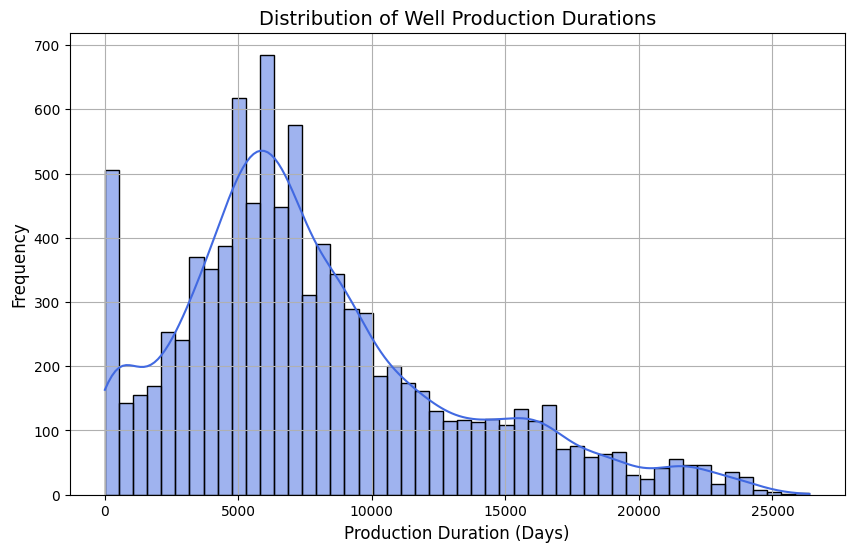

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['production_time'], bins=50, kde=True, color='royalblue')

# Customize labels
plt.xlabel('Production Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Well Production Durations', fontsize=14)
plt.grid(True)

# Show plot
plt.show()

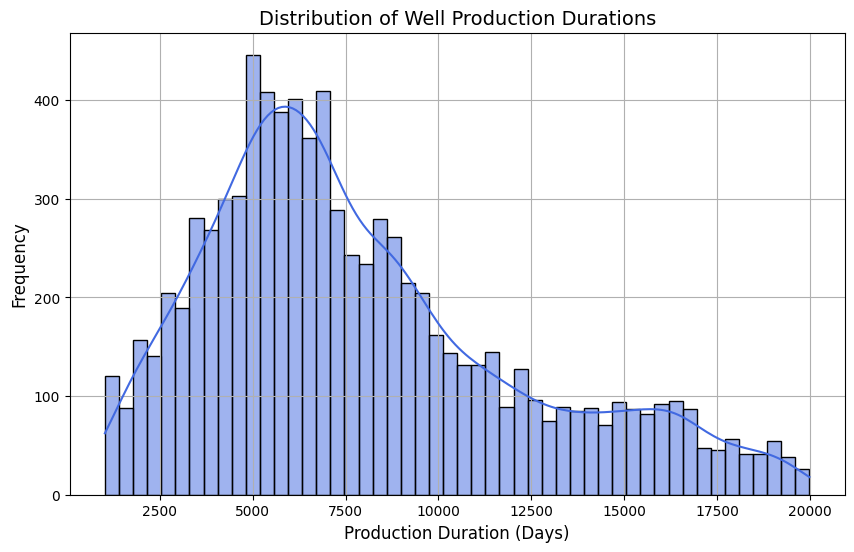

In [ ]:
#Removing outlier values from based on production time (mostly large amount of 0-days and long tail)
df = df[df['production_time'] < 20000]
df = df[df['production_time'] > 1000]

plt.figure(figsize=(10, 6))
sns.histplot(df['production_time'], bins=50, kde=True, color='royalblue')

plt.xlabel('Production Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Well Production Durations', fontsize=14)
plt.grid(True)
plt.show()

In [18]:
maxVal = df['production_time'].max()
minVal = df['production_time'].min()
modeVal = df['production_time'].mode()[0]
stdVal = df['production_time'].std()

print(f'Max: {maxVal}, Min: {minVal}, Mode: {modeVal}, STD: {stdVal}')

Max: 19984, Min: 1023, Mode: 6230, STD: 4260.779042309637


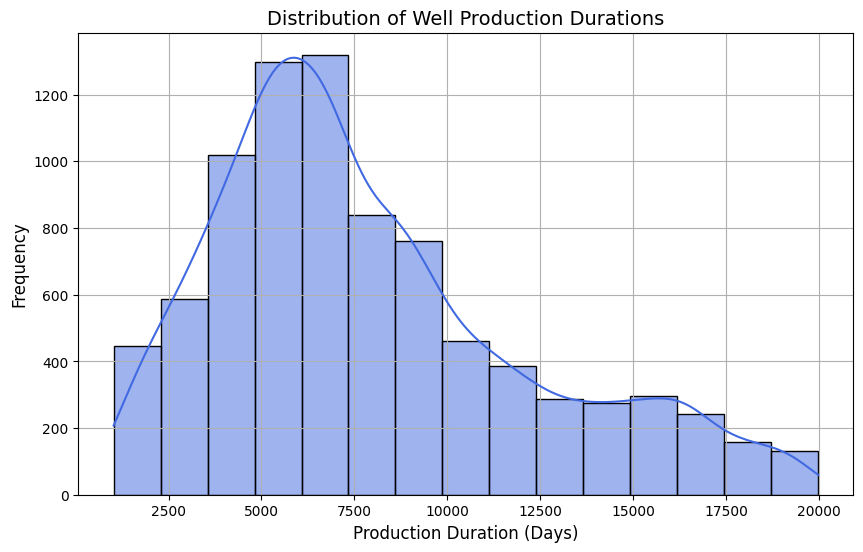

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['production_time'], bins=15, kde=True, color='royalblue')

plt.xlabel('Production Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Well Production Durations', fontsize=14)
plt.grid(True)

plt.show()

In [ ]:
df['Year'] = df['RR Date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8508 entries, 0 to 9484
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   WA                     8508 non-null   int64         
 1   Form                   8508 non-null   object        
 2   Abandoned Status Date  8508 non-null   datetime64[ns]
 3   Area                   8508 non-null   float64       
 4   RR Date                8508 non-null   datetime64[ns]
 5   Fluid_AGAS             8508 non-null   bool          
 6   Fluid_GAS              8508 non-null   bool          
 7   Fluid_MGAS             8508 non-null   bool          
 8   Fluid_MOG              8508 non-null   bool          
 9   Fluid_MOIL             8508 non-null   bool          
 10  Fluid_OIL              8508 non-null   bool          
 11  Fluid_UND              8508 non-null   bool          
 12  Fluid_WATR             8508 non-null   bool          
 13  producti

In [ ]:
#Adding extra attributes from Total Production (1).csv
prodDays = pd.read_csv('./data/BC Total Production (1).csv')
prodDays['WA'] = prodDays['Well Authorization Number']

prodDays['Average Production Days'] = prodDays['Average Production Days'].astype(float) / 30.5 #Average number of days in a month a well produced for
df['Form'] = df['Form'].astype('int')

df = pd.merge(df, prodDays, on='WA', how='outer')
df = df.dropna(subset=['Year'])
df['Average Production Days'] = df['Average Production Days'].fillna(df['Average Production Days'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8508 entries, 0 to 21946
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   WA                         8508 non-null   int64         
 1   Form                       8508 non-null   float64       
 2   Abandoned Status Date      8508 non-null   datetime64[ns]
 3   Area                       8508 non-null   float64       
 4   RR Date                    8508 non-null   datetime64[ns]
 5   Fluid_AGAS                 8508 non-null   object        
 6   Fluid_GAS                  8508 non-null   object        
 7   Fluid_MGAS                 8508 non-null   object        
 8   Fluid_MOG                  8508 non-null   object        
 9   Fluid_MOIL                 8508 non-null   object        
 10  Fluid_OIL                  8508 non-null   object        
 11  Fluid_UND                  8508 non-null   object        
 12  Fluid_WATR

In [ ]:
#Adding extra attributes from well_authorizations_issued.csv
depth = pd.read_csv('./data/well_authorizations_issued.csv')
depth ['WA'] = depth['WA #']
depth = depth[['WA', 'Ground Elev.', 'Proj. Depth']]
df = pd.merge(df, depth, on='WA')

df['Proj. Depth'] = df['Proj. Depth'].str.replace(',', '')
df['Proj. Depth'] = df['Proj. Depth'].astype(float)

#Removing some outlier values
df = df[df['Proj. Depth'] < 4500]
df = df[df['Ground Elev.'] < 1300]
df = df[df['Ground Elev.'] > 250]

#filling NA project depth based on average depth of area
df["Proj. Depth"] = df.groupby(["Area"])["Proj. Depth"].transform(
    lambda x: x.fillna(x.mean()) if not x.dropna().empty else x
)
#Otherwise filling with median value
df['Proj. Depth'] = df["Proj. Depth"].fillna(df["Proj. Depth"].median())

df['Ground Elev.'] = df['Ground Elev.'].fillna(df['Ground Elev.'].mean())




In [24]:
df = df[['Form', 'Area', 'Fluid_AGAS', 'Fluid_GAS', 'Fluid_MGAS', 'Fluid_MOG', 'Fluid_MOIL', 'Fluid_OIL', 'Fluid_UND', 'Fluid_WATR', 'production_time', 'Year', 'Average Production Days', 'Ground Elev.', 'Proj. Depth']]
df.to_csv('./data/cleanedData3.csv')
df

,Form,Area,Fluid_AGAS,Fluid_GAS,Fluid_MGAS,Fluid_MOG,Fluid_MOIL,Fluid_OIL,Fluid_UND,Fluid_WATR,production_time,Year,Average Production Days,Ground Elev.,Proj. Depth
3,2200.0,8120.0,False,True,False,False,False,False,False,False,16472.0,1951.0,0.661680,835.4,1010.0
8,4100.0,3600.0,False,False,False,False,False,False,False,True,16907.0,1952.0,0.000000,622.0,1455.0
9,2800.0,3600.0,False,False,False,False,False,False,False,True,16907.0,1952.0,0.000000,622.0,1455.0
14,6200.0,4000.0,False,True,False,False,False,False,False,False,8579.0,1997.0,0.700000,631.9,1963.0
15,6200.0,4000.0,False,True,False,False,False,False,False,False,8579.0,1997.0,0.700000,631.9,1963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,4800.0,2020.0,False,False,False,False,False,True,False,False,2914.0,2017.0,0.485902,764.6,3700.0
10015,2800.0,8120.0,False,False,False,False,False,False,False,True,2094.0,2017.0,0.989508,788.7,1765.0
10016,2850.0,8120.0,False,False,False,False,False,False,False,True,2094.0,2017.0,0.989508,788.7,1765.0
10017,2700.0,8120.0,False,False,False,False,False,False,False,True,2094.0,2017.0,0.989508,788.7,1765.0


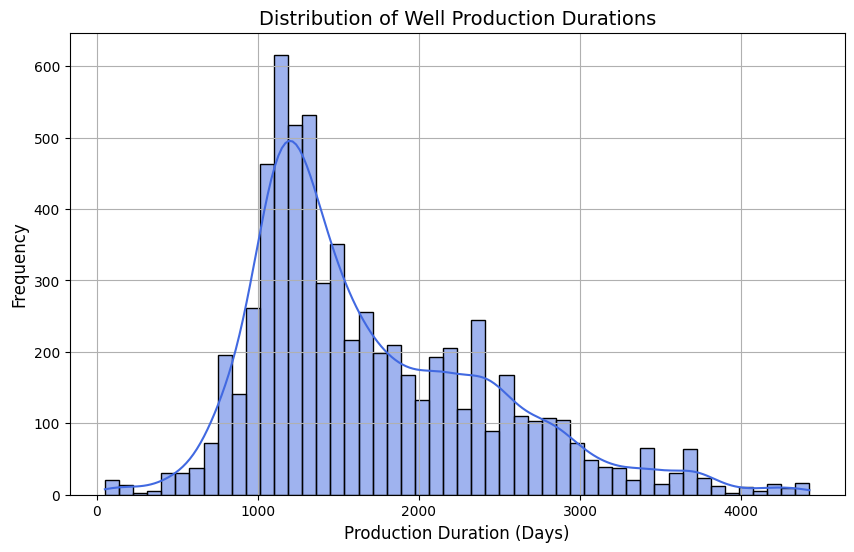

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Proj. Depth'], bins=50, kde=True, color='royalblue')

# Customize labels
plt.xlabel('Production Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Well Production Durations', fontsize=14)
plt.grid(True)

# Show plot
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 3 to 10018
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Form                     6704 non-null   float64
 1   Area                     6704 non-null   float64
 2   Fluid_AGAS               6704 non-null   object 
 3   Fluid_GAS                6704 non-null   object 
 4   Fluid_MGAS               6704 non-null   object 
 5   Fluid_MOG                6704 non-null   object 
 6   Fluid_MOIL               6704 non-null   object 
 7   Fluid_OIL                6704 non-null   object 
 8   Fluid_UND                6704 non-null   object 
 9   Fluid_WATR               6704 non-null   object 
 10  production_time          6704 non-null   float64
 11  Year                     6704 non-null   float64
 12  Average Production Days  6704 non-null   float64
 13  Ground Elev.             6704 non-null   float64
 14  Proj. Depth              670

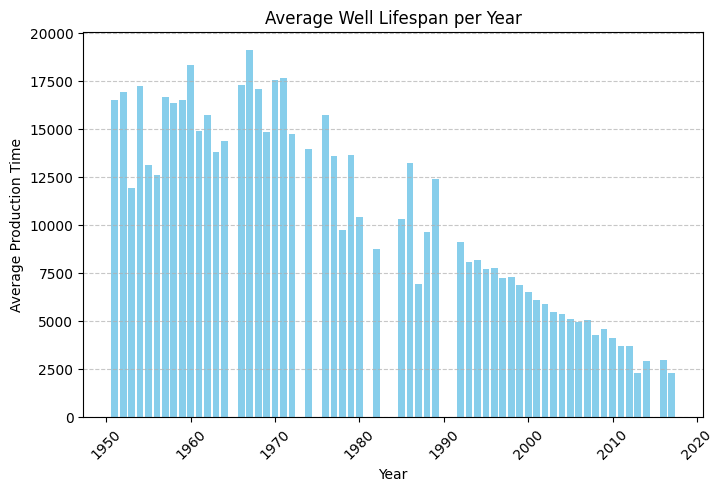

In [31]:
avg_values = df.groupby('Year')['production_time'].mean()

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(avg_values.index, avg_values.values, color='skyblue')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Production Time')
plt.title('Average Well Lifespan per Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()